In [37]:
import json
import numpy as np

In [2]:
with open("data_best_time.json") as f:
    data = json.load(f)

In [3]:
X = data["X"]
y = data["y"]

In [5]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [31]:
model = RFR(n_estimators=10)

In [32]:
model.fit(X,y)

RandomForestRegressor(n_estimators=10)

In [33]:
model.score(X,y)

0.7864449404553562

In [34]:
y_pred = model.predict(X)

In [35]:
y_pred

array([128.3, 151.9, 159. , ..., 175.2, 200.8, 153.8])

In [50]:
a=np.corrcoef(np.array(X).T,np.array(y))

In [52]:
len(X[0])

29

In [55]:
import matplotlib.pyplot as plt

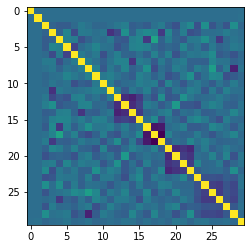

In [56]:
plt.imshow(a)

In [59]:
a[-1,:]

array([ 0.00613864,  0.01710718, -0.04063716, -0.00876795,  0.0050582 ,
        0.04035751, -0.03008667, -0.01052037,  0.03001696, -0.03378931,
       -0.02318995,  0.00570647, -0.01698416,  0.0281674 ,  0.02171547,
       -0.0382115 ,  0.02128719, -0.0238107 ,  0.00417481, -0.03823597,
        0.0551289 ,  0.03297397, -0.04335907,  0.02358226,  0.03471666,
       -0.01896834, -0.01105266,  0.01208483, -0.03368593,  1.        ])